In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

In [4]:
df[['sepallength','sepalwidth']]

,sepallength,sepalwidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

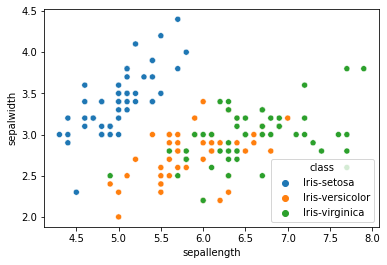

In [12]:
sns.scatterplot(data = df,x = df['sepallength'],y = df['sepalwidth'],hue = 'class')

In [13]:
from sklearn.cluster import KMeans


In [19]:
km = KMeans(n_clusters=3)

In [20]:
km.fit(df[['sepallength','sepalwidth']])

KMeans(n_clusters=3)

In [21]:
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.418     ],
       [5.77358491, 2.69245283]])

In [22]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<AxesSubplot:title={'center':'k means'}, xlabel='sepallength', ylabel='sepalwidth'>

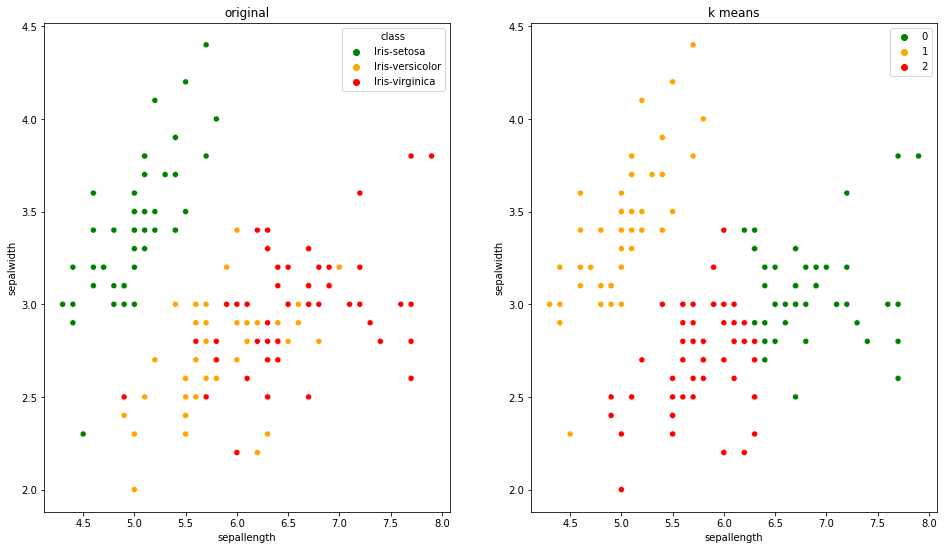

In [26]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title('original')
sns.scatterplot(data = df,x = df['sepallength'],y = df['sepalwidth'],hue = 'class',palette=['green','orange','red'])
plt.subplot(122)
plt.title('k means')
sns.scatterplot(data = df,x = df['sepallength'],y = df['sepalwidth'],hue = km.labels_,palette=['green','orange','red'])

In [30]:
def makebinary(p):
    if p == 'Iris-setosa':
        return 1
    elif p=='Iris-versicolor':
        return 2
    else:
        return 0

In [31]:
cls = df['class'].apply(makebinary)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(cls,km.labels_))
print(accuracy_score(cls,km.labels_)*100)

[[35  0 15]
 [ 0 50  0]
 [12  0 38]]
82.0
